In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [253]:
labels = pd.read_csv("../train_labels.csv")
values = pd.read_csv("../train_values.csv")

In [254]:
labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [255]:
values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


### Análisis de `has_superstructure`

In [256]:
cols = list(values.columns)
new_cols = ["building_id"]

for col in cols:
    if (col.startswith("has_superstructure")):
        new_cols.append(col)

new_cols

['building_id',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [257]:
values_superstructure = values[new_cols]
values_superstructure.set_index("building_id", inplace=True)

values_superstructure.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0
28830,0,1,0,0,0,0,0,0,0,0,0
94947,0,1,0,0,0,0,0,0,0,0,0
590882,0,1,0,0,0,0,1,1,0,0,0
201944,1,0,0,0,0,0,0,0,0,0,0


In [258]:
values_merged = values_superstructure.merge(labels, left_on="building_id", right_on="building_id", how='inner')
values_merged.set_index("building_id", inplace=True)

values_merged

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0,3
28830,0,1,0,0,0,0,0,0,0,0,0,2
94947,0,1,0,0,0,0,0,0,0,0,0,3
590882,0,1,0,0,0,0,1,1,0,0,0,2
201944,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
688636,0,1,0,0,0,0,0,0,0,0,0,2
669485,0,1,0,0,0,0,0,0,0,0,0,3
602512,0,1,0,0,0,0,0,0,0,0,0,3


In [259]:
cols = list(values_merged.columns)

cols.remove('damage_grade')

cols

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [260]:
functions_to_apply = {}

for col in cols:
    functions_to_apply[col] = "sum"

In [261]:
values_grouped = values_merged.groupby("damage_grade").agg(functions_to_apply)

values_grouped

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


Text(0, 0.5, 'Cantidad de edificaciones')

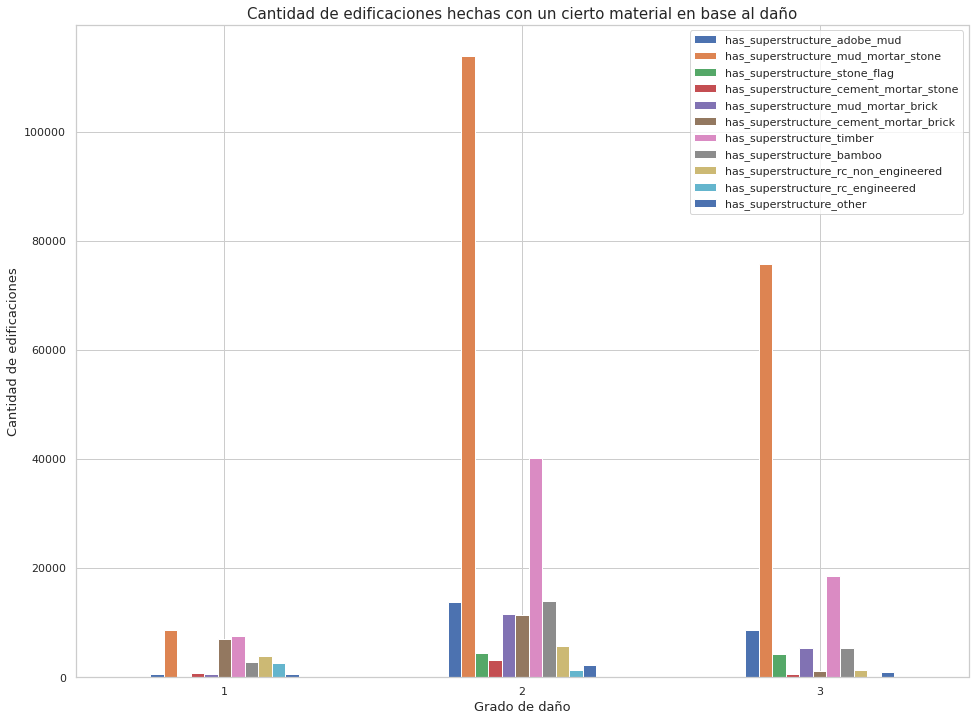

In [262]:
values_grouped.plot(kind='bar', figsize=(16, 12), rot=0)
plt.title("Cantidad de edificaciones hechas con un cierto material en base al daño", fontsize=15)
plt.xlabel("Grado de daño", fontsize=13)
plt.ylabel("Cantidad de edificaciones", fontsize=13)

Text(0, 0.5, 'Cantidad de edificaciones')

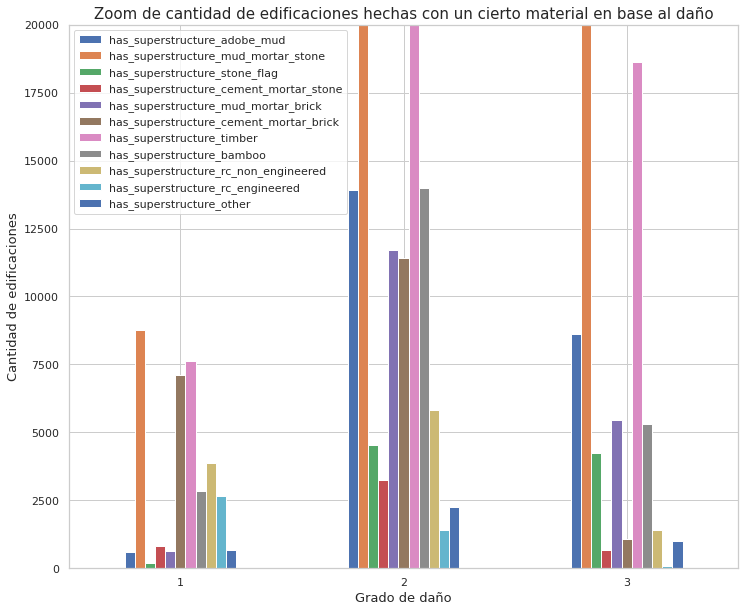

In [263]:
values_grouped.plot(kind='bar', figsize=(12, 10), ylim=[0, 20000], rot=0)
plt.title("Zoom de cantidad de edificaciones hechas con un cierto material en base al daño", fontsize=15)
plt.xlabel("Grado de daño", fontsize=13)
plt.ylabel("Cantidad de edificaciones", fontsize=13)

In [264]:
values_grouped.T

damage_grade,1,2,3
has_superstructure_adobe_mud,594,13902,8605
has_superstructure_mud_mortar_stone,8760,113947,75854
has_superstructure_stone_flag,182,4534,4231
has_superstructure_cement_mortar_stone,829,3248,675
has_superstructure_mud_mortar_brick,623,11698,5440
has_superstructure_cement_mortar_brick,7105,11421,1089
has_superstructure_timber,7642,40187,18621
has_superstructure_bamboo,2839,14001,5314
has_superstructure_rc_non_engineered,3857,5832,1410
has_superstructure_rc_engineered,2656,1402,75


In [265]:
values_grouped.T.iloc[1]

damage_grade
1      8760
2    113947
3     75854
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [266]:
cols = list(values_grouped.columns)
renamed_cols = []

for col in cols:
    renamed_cols.append(col[19:].replace("_", " "))
    
renamed_cols

['adobe mud',
 'mud mortar stone',
 'stone flag',
 'cement mortar stone',
 'mud mortar brick',
 'cement mortar brick',
 'timber',
 'bamboo',
 'rc non engineered',
 'rc engineered',
 'other']

In [267]:
colors = ["#F0E68C", "#F5DEB3", "#D3D3D3", "#FFB6C1", "#FAFAD2", "#FF6347", "#FFA500", "#6B8E23", "#4169E1", "#C0C0C0", "#EE82EE"]

In [268]:
explodes = [0 for i in range(len(renamed_cols))]
explodes[2] = explodes[3] = explodes[4] = 0.1

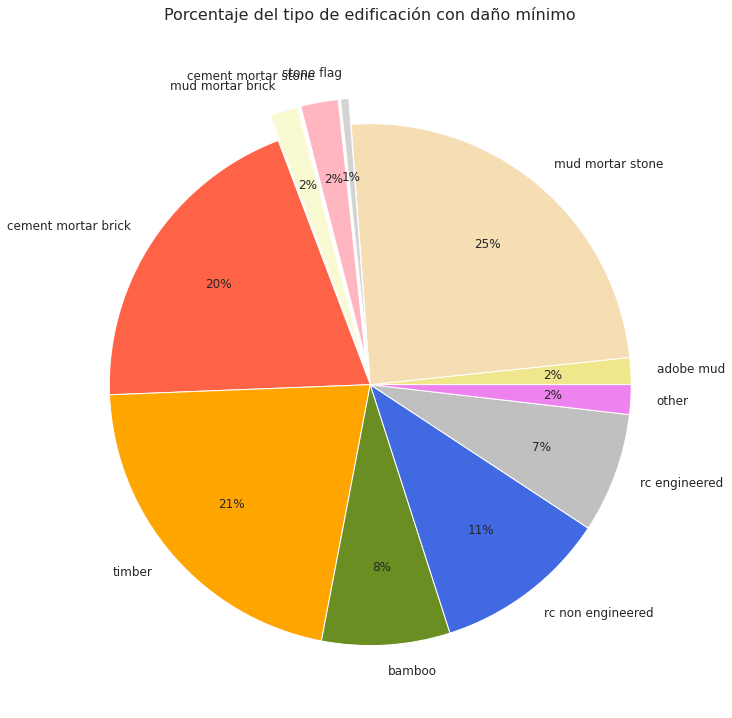

In [269]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_grouped.iloc[0], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7, colors=colors,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, explode=explodes)
ax.set_title("Porcentaje del tipo de edificación con daño mínimo", fontsize=16, y=1.05);

In [270]:
explodes = [0 for i in range(len(renamed_cols))]

explodes[2] = explodes[3] = explodes[9] = explodes[10] = 0.1

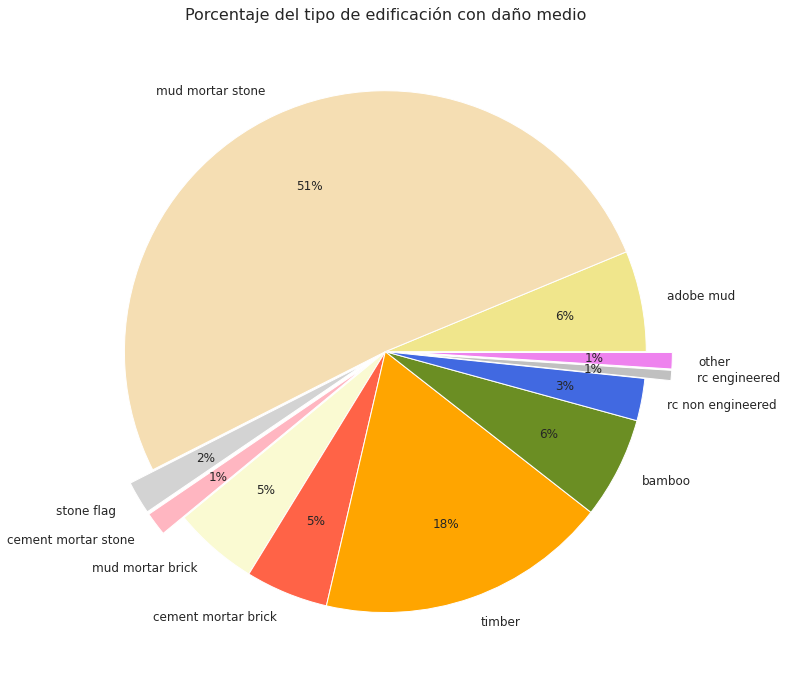

In [271]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_grouped.iloc[1], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7, colors=colors,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, explode=explodes)
plt.title("Porcentaje del tipo de edificación con daño medio", fontsize=16);

In [272]:
explodes = [0 for i in range(len(renamed_cols))]

explodes[3] = explodes[5] = explodes[8] = explodes[9] = explodes[10] = 0.1

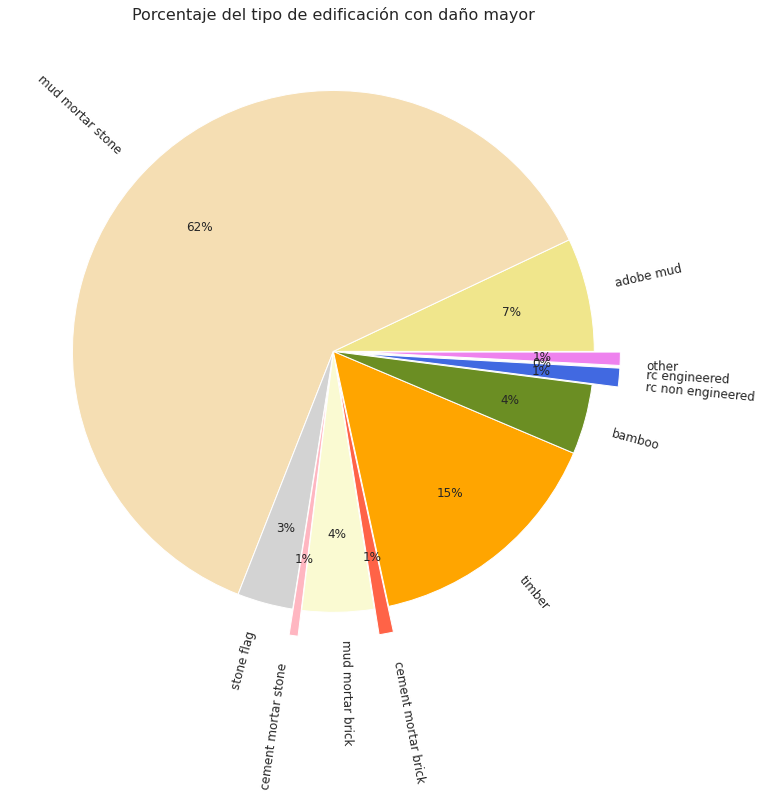

In [273]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_grouped.iloc[2], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7, colors=colors,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=1, explode=explodes)
plt.title("Porcentaje del tipo de edificación con daño mayor", fontsize=16);

In [274]:
new_cols.remove('building_id')
for col in new_cols:
    print(col + ": " + str(values_merged[col].sum()))

has_superstructure_adobe_mud: 23101
has_superstructure_mud_mortar_stone: 198561
has_superstructure_stone_flag: 8947
has_superstructure_cement_mortar_stone: 4752
has_superstructure_mud_mortar_brick: 17761
has_superstructure_cement_mortar_brick: 19615
has_superstructure_timber: 66450
has_superstructure_bamboo: 22154
has_superstructure_rc_non_engineered: 11099
has_superstructure_rc_engineered: 4133
has_superstructure_other: 3905


#### La mayoría de buildings estan hechas con mud mortar stone entonces filtremos los que tienen solo eso para ver de que otra cosa estan fabricados.

In [275]:
values_mud_mortar_stone = values_merged[values_merged['has_superstructure_mud_mortar_stone'] == 1]\
                                        .drop(columns='has_superstructure_mud_mortar_stone')
values_mud_mortar_stone

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,
802906,1,0,0,0,0,0,0,0,0,0,3
28830,0,0,0,0,0,0,0,0,0,0,2
94947,0,0,0,0,0,0,0,0,0,0,3
590882,0,0,0,0,0,1,1,0,0,0,2
333020,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
827012,0,0,0,0,0,0,0,0,0,0,3
688636,0,0,0,0,0,0,0,0,0,0,2
669485,0,0,0,0,0,0,0,0,0,0,3


In [276]:
functions_to_apply = {}
cols.remove('has_superstructure_mud_mortar_stone')

for col in cols:
    functions_to_apply[col] = "sum"
    
values_mud_mortar_stone_grouped = values_mud_mortar_stone.groupby("damage_grade").agg(functions_to_apply)
values_mud_mortar_stone_grouped

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,
1,189,128,160,112,131,3076,1015,269,6,176
2,4874,3195,1603,1956,880,30108,9981,2153,22,1578
3,2858,2806,309,942,151,15503,4192,1051,8,659


In [277]:
renamed_cols.remove('mud mortar stone')

In [278]:
colors.remove("#F5DEB3")

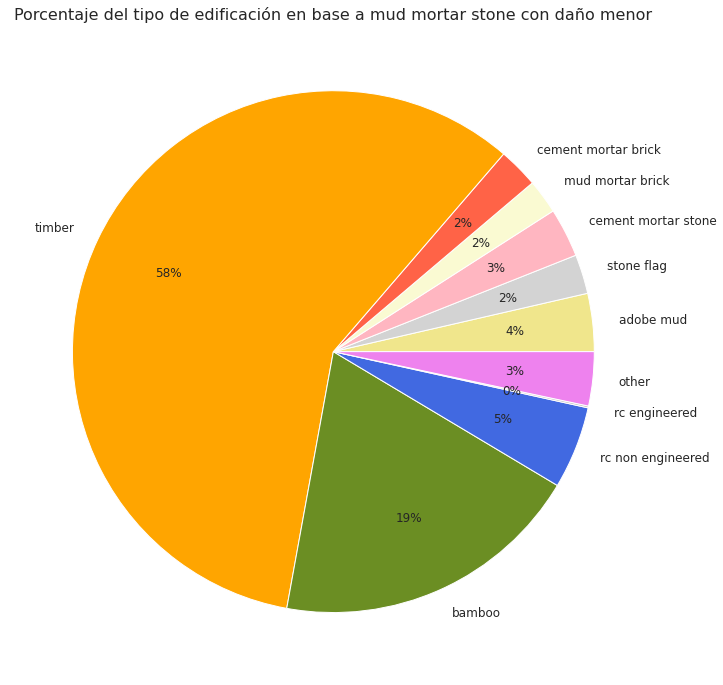

In [279]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_mud_mortar_stone_grouped.iloc[0], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, colors=colors)
plt.title("Porcentaje del tipo de edificación en base a mud mortar stone con daño menor", fontsize=16);

Text(0, 0.5, 'Cantidad de edificaciones')

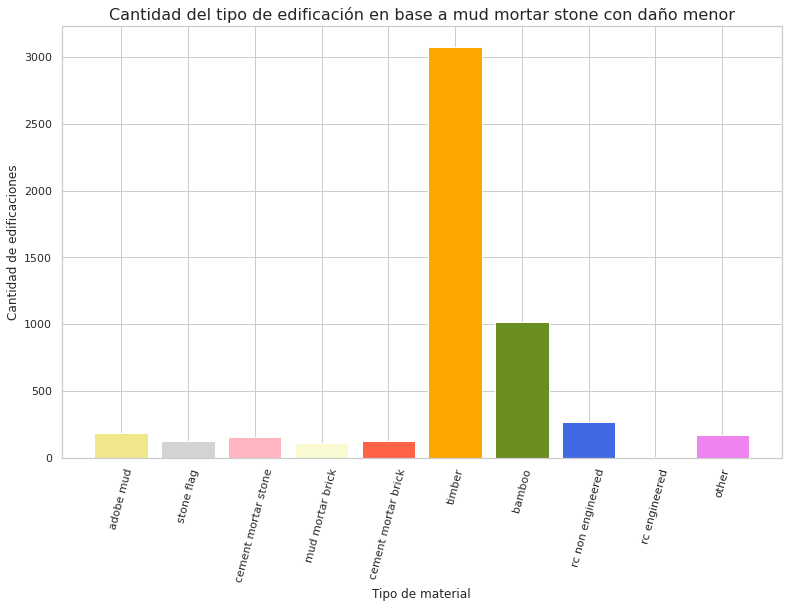

In [280]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_mud_mortar_stone_grouped.columns, values_mud_mortar_stone_grouped.iloc[0], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación en base a mud mortar stone con daño menor", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

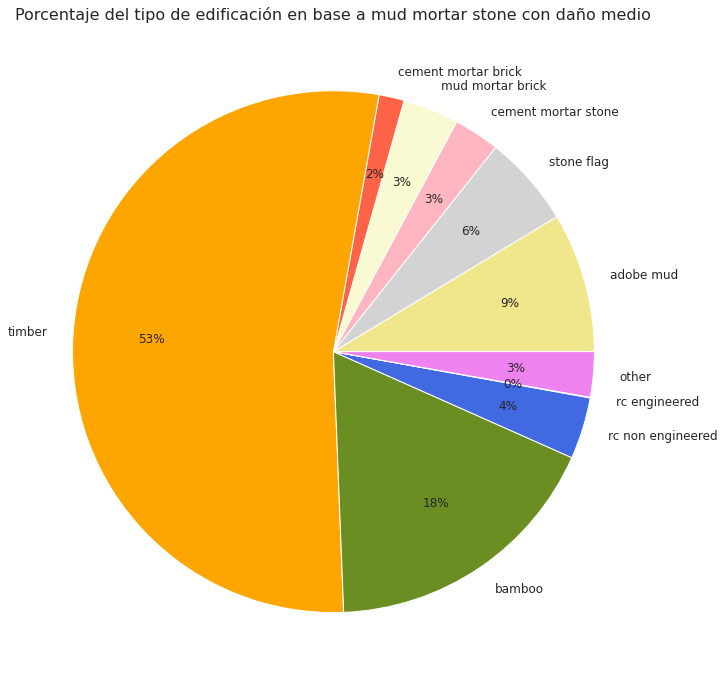

In [281]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_mud_mortar_stone_grouped.iloc[1], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, colors=colors)
plt.title("Porcentaje del tipo de edificación en base a mud mortar stone con daño medio", fontsize=16);

Text(0, 0.5, 'Cantidad de edificaciones')

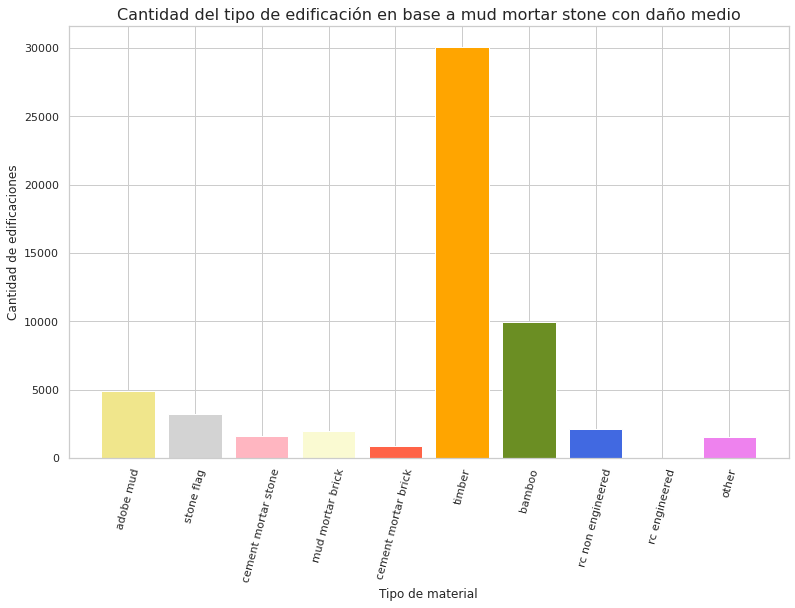

In [282]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_mud_mortar_stone_grouped.columns, values_mud_mortar_stone_grouped.iloc[1], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación en base a mud mortar stone con daño medio", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

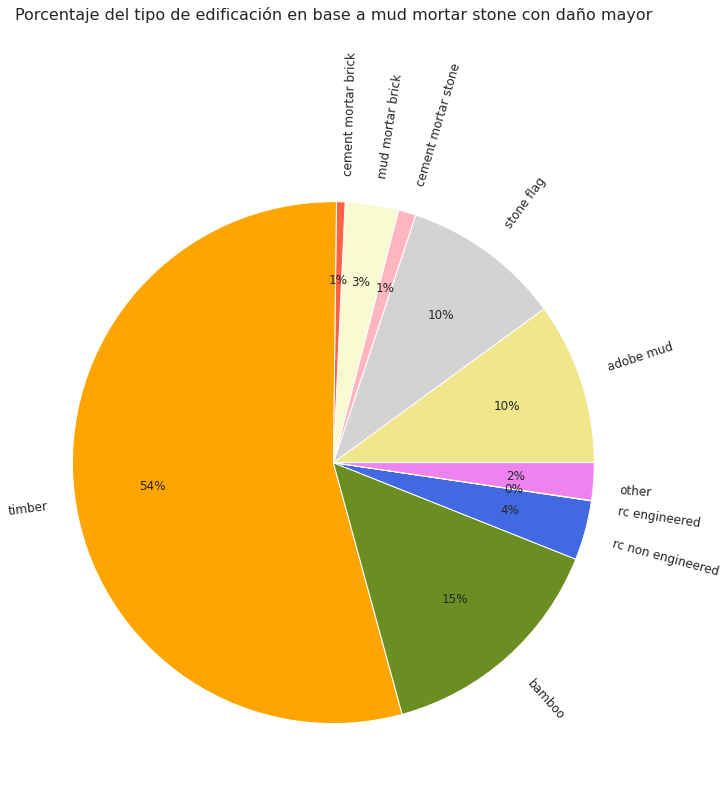

In [283]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_mud_mortar_stone_grouped.iloc[2], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=1, colors=colors)
plt.title("Porcentaje del tipo de edificación en base a mud mortar stone con daño mayor", fontsize=16, y=1.17);

Text(0, 0.5, 'Cantidad de edificaciones')

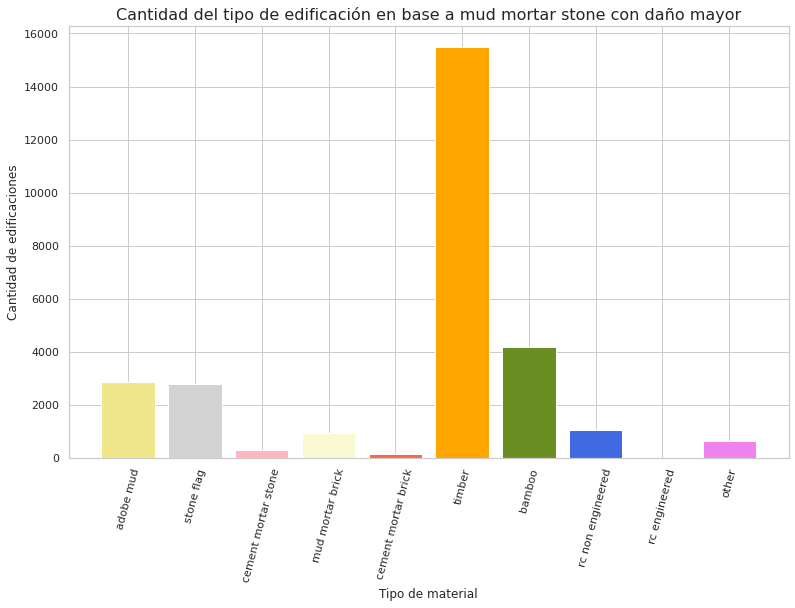

In [284]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_mud_mortar_stone_grouped.columns, values_mud_mortar_stone_grouped.iloc[2], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación en base a mud mortar stone con daño mayor", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

### Cantidad de edificaciones en base a mud mortar stone por material dependiendo del daño recibido

Comparación a misma escala

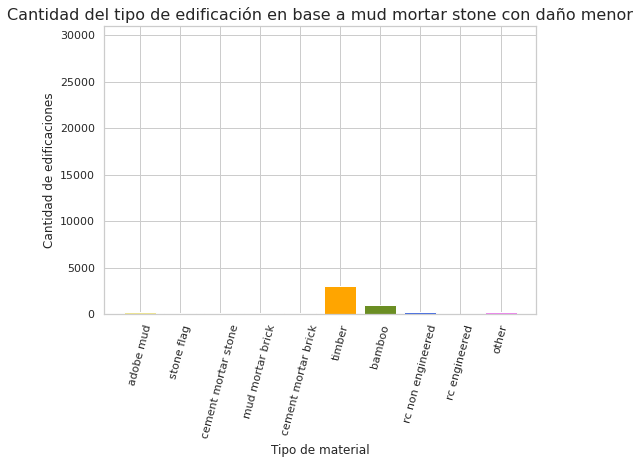

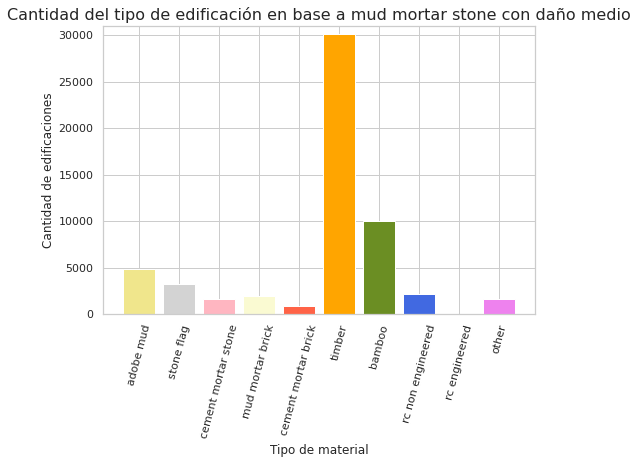

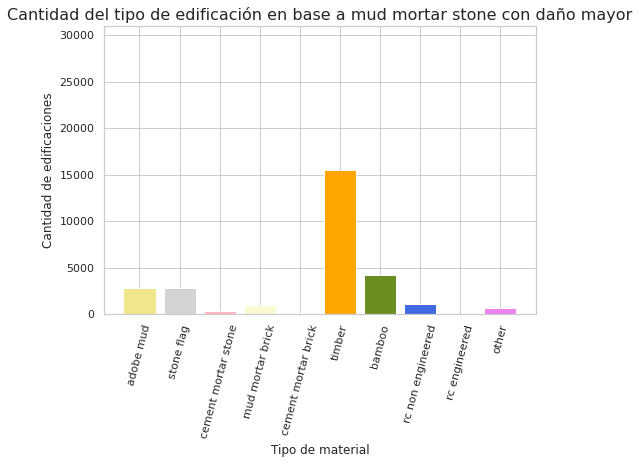

In [285]:
grado_danio = ["menor", "medio", "mayor"]

for i in range(3):

    fig = plt.figure(figsize=[6,4])
    ax = fig.add_axes([0,0,1,1])
    ax.bar(values_mud_mortar_stone_grouped.columns, values_mud_mortar_stone_grouped.iloc[i], color=colors, tick_label=renamed_cols)
    plt.xticks(rotation = 75)
    plt.title("Cantidad del tipo de edificación en base a mud mortar stone con daño " + grado_danio[i], fontsize=16);
    plt.xlabel("Tipo de material")
    plt.ylabel("Cantidad de edificaciones")
    plt.ylim([0, 31000])

### Analisis sin mud mortar stone

In [286]:
values_without_mud_mortar_stone = values_merged[values_merged['has_superstructure_mud_mortar_stone'] == 0]\
                                        .drop(columns='has_superstructure_mud_mortar_stone')
values_without_mud_mortar_stone

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,
201944,1,0,0,0,0,0,0,0,0,0,3
475515,0,0,0,0,1,1,0,0,0,0,1
989500,0,0,0,0,1,0,0,0,0,0,1
452227,0,0,0,0,1,0,0,0,0,0,2
605134,0,1,0,0,0,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
595396,0,0,0,0,1,0,0,0,0,0,2
858025,0,0,0,0,0,0,0,1,0,0,1
695987,0,1,0,0,0,1,1,0,0,0,2


In [287]:
functions_to_apply = {}

for col in cols:
    functions_to_apply[col] = "sum"
    
values_without_mud_mortar_stone = values_without_mud_mortar_stone.groupby("damage_grade").agg(functions_to_apply)
values_without_mud_mortar_stone

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,
1,405,54,669,511,6974,4566,1824,3588,2650,480
2,9028,1339,1645,9742,10541,10079,4020,3679,1380,670
3,5747,1425,366,4498,938,3118,1122,359,67,342


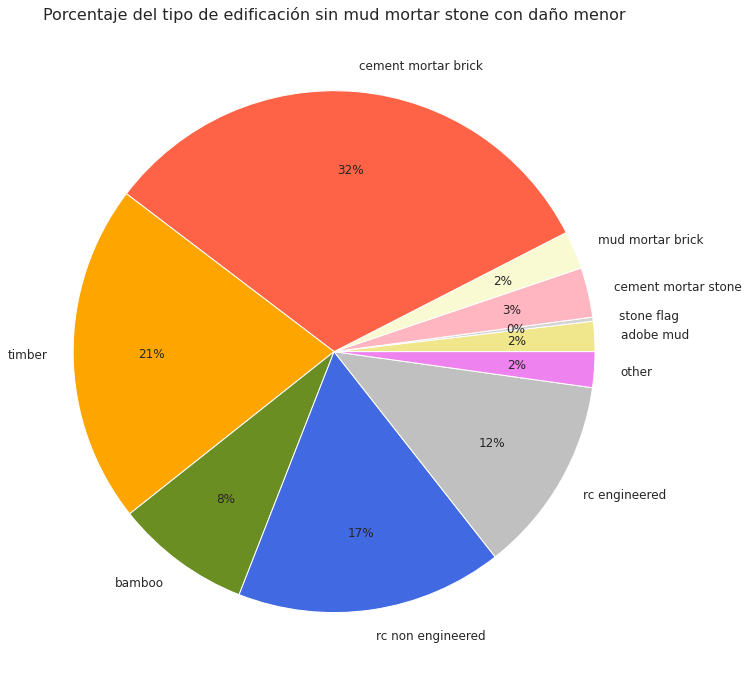

In [288]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_without_mud_mortar_stone.iloc[0], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, colors=colors)
plt.title("Porcentaje del tipo de edificación sin mud mortar stone con daño menor", fontsize=16);

Text(0, 0.5, 'Cantidad de edificaciones')

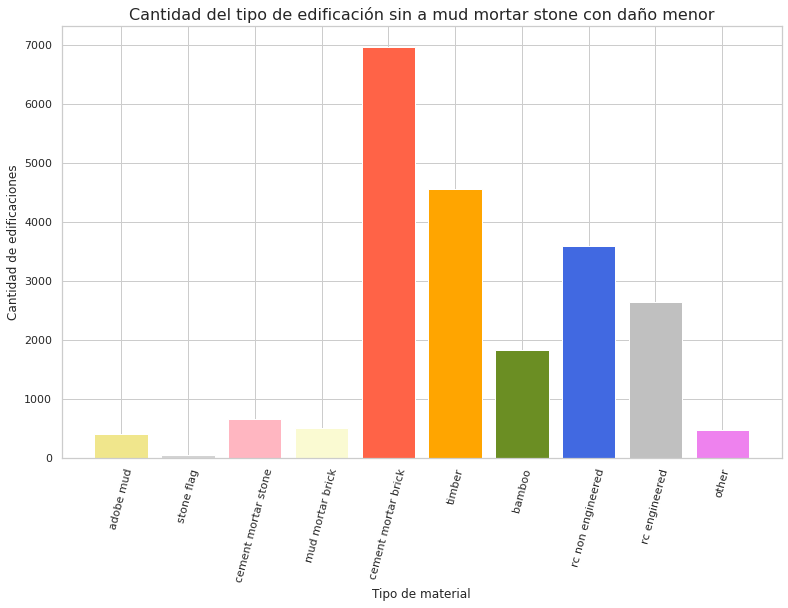

In [289]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_without_mud_mortar_stone.columns, values_without_mud_mortar_stone.iloc[0], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación sin a mud mortar stone con daño menor", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

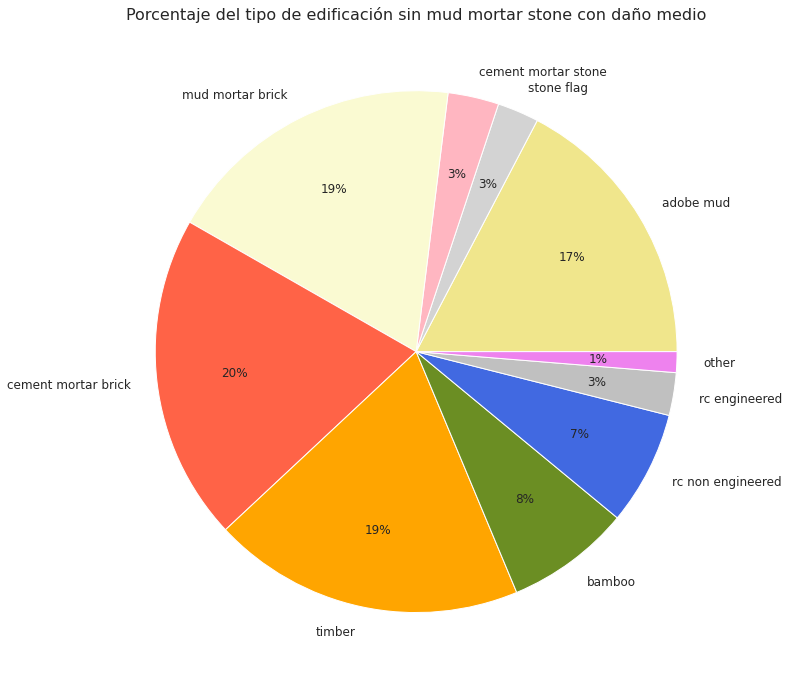

In [290]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_without_mud_mortar_stone.iloc[1], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, colors=colors)
plt.title("Porcentaje del tipo de edificación sin mud mortar stone con daño medio", fontsize=16);

Text(0, 0.5, 'Cantidad de edificaciones')

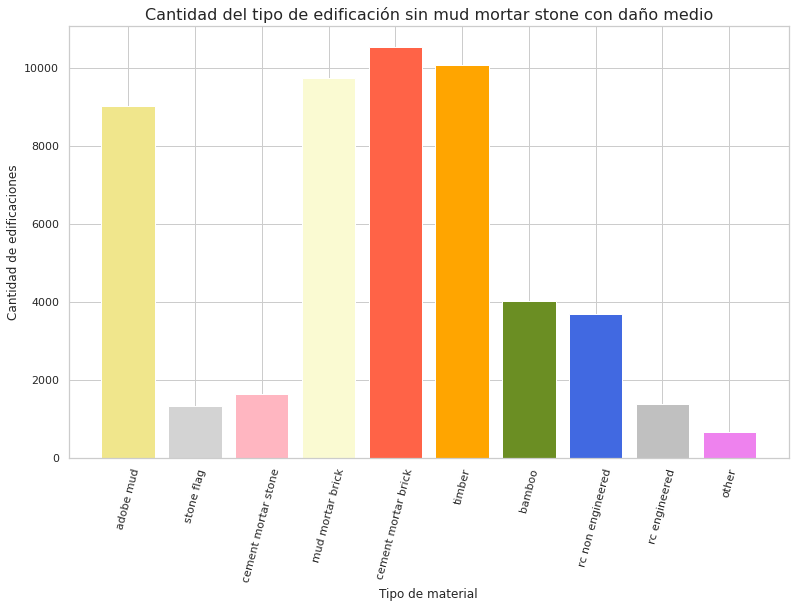

In [291]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_without_mud_mortar_stone.columns, values_without_mud_mortar_stone.iloc[1], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación sin mud mortar stone con daño medio", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

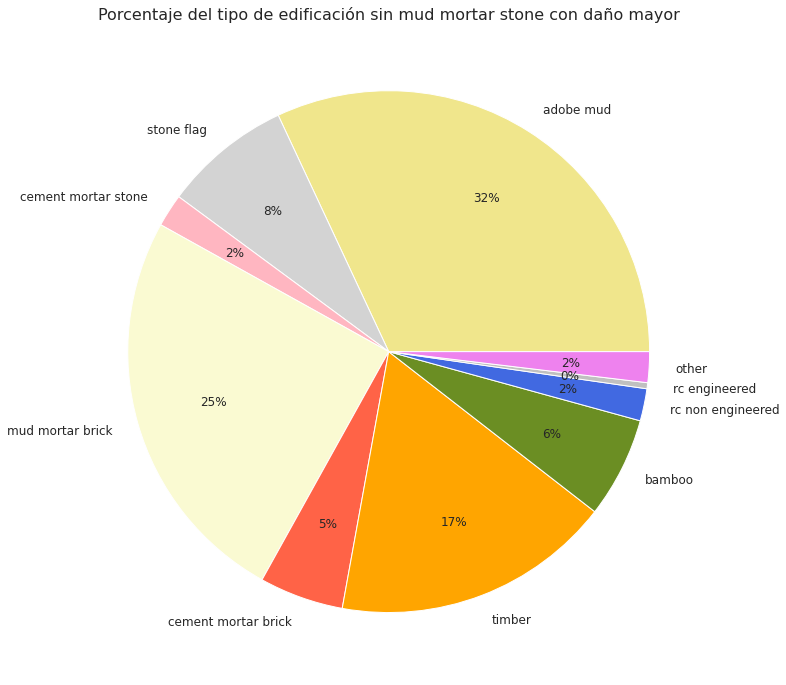

In [292]:
pie, ax = plt.subplots(figsize=[16,12])
plt.pie(x=values_without_mud_mortar_stone.iloc[2], autopct="%.0f%%", labels=renamed_cols, pctdistance=0.7,\
        normalize=True, textprops={'fontsize': 12}, labeldistance=1.1, rotatelabels=0, colors=colors)
plt.title("Porcentaje del tipo de edificación sin mud mortar stone con daño mayor", fontsize=16);

Text(0, 0.5, 'Cantidad de edificaciones')

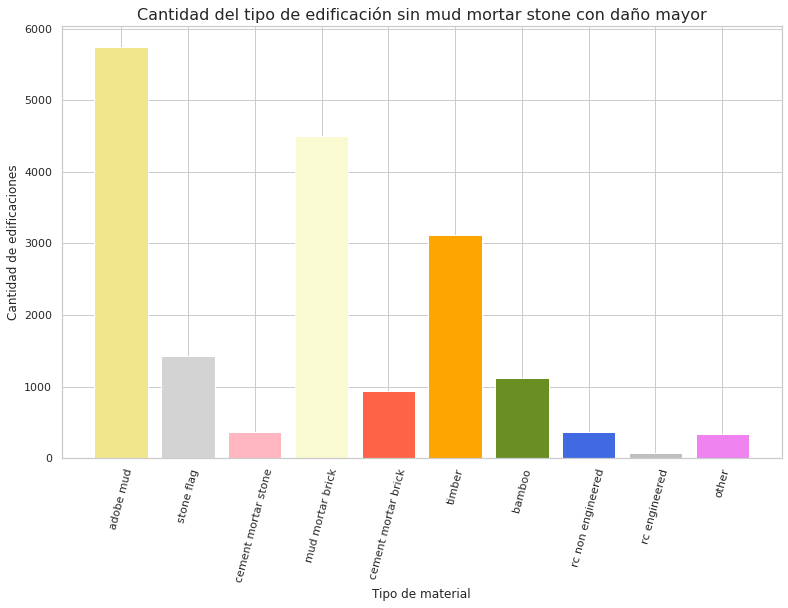

In [293]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_axes([0,0,1,1])

ax.bar(values_without_mud_mortar_stone.columns, values_without_mud_mortar_stone.iloc[2], color=colors, tick_label=renamed_cols)
plt.xticks(rotation = 75)
plt.title("Cantidad del tipo de edificación sin mud mortar stone con daño mayor", fontsize=16);
plt.xlabel("Tipo de material")
plt.ylabel("Cantidad de edificaciones")

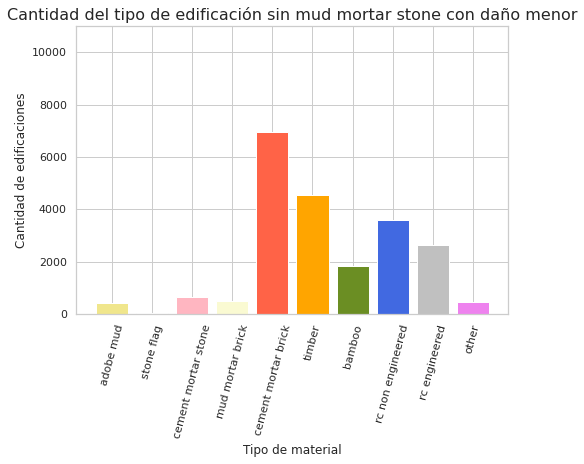

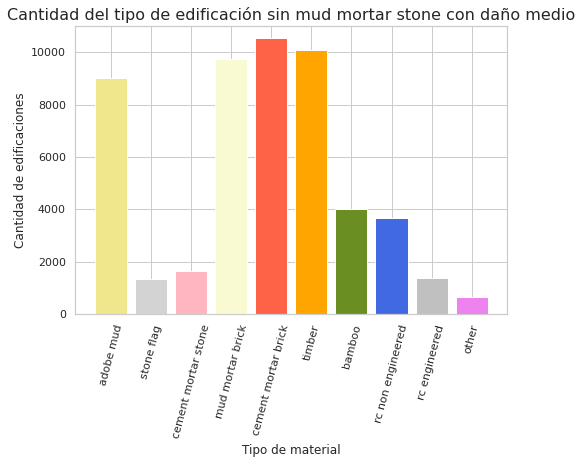

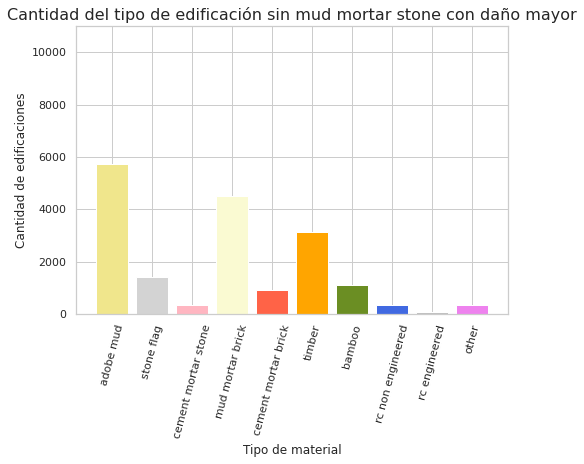

In [294]:
grado_danio = ["menor", "medio", "mayor"]

for i in range(3):

    fig = plt.figure(figsize=[6,4])
    ax = fig.add_axes([0,0,1,1])
    ax.bar(values_without_mud_mortar_stone.columns, values_without_mud_mortar_stone.iloc[i], color=colors, tick_label=renamed_cols)
    plt.xticks(rotation = 75)
    plt.title("Cantidad del tipo de edificación sin mud mortar stone con daño " + grado_danio[i], fontsize=16);
    plt.xlabel("Tipo de material")
    plt.ylabel("Cantidad de edificaciones")
    plt.ylim([0, 11000])